# **LINE CHART**

### INSTALL PACKAGES & IMPORT LIBRARIES

In [4]:
!pip install calplot

In [5]:
!pip install plotly

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.graph_objs as go
import calplot
import calendar

### LOAD DATASET

In [7]:
pizza = pd.read_csv("C:/Users/Jordi Morente/Downloads/dominos_stock_price/Dominos_Stock_Data.csv")
pizza.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-16,254.89,257.61,253.08,255.96,251.60,525200
1,2019-10-17,256.12,259.96,255.78,256.45,252.09,515100
2,2019-10-18,257.45,258.40,254.23,255.70,251.35,609900
3,2019-10-21,256.61,259.84,255.67,257.52,253.14,499600
4,2019-10-22,257.27,259.47,255.38,258.94,254.53,343100


### CHECKING THE TYPES AND MISSING VALUES

In [8]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       505 non-null    object 
 1   Open       505 non-null    float64
 2   High       505 non-null    float64
 3   Low        505 non-null    float64
 4   Close      505 non-null    float64
 5   Adj Close  505 non-null    float64
 6   Volume     505 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.7+ KB


In [9]:
pizza.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
pizza.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### VISUALIZATION

PRICE EVOLUTION FOR 2 YEAR PERIOD

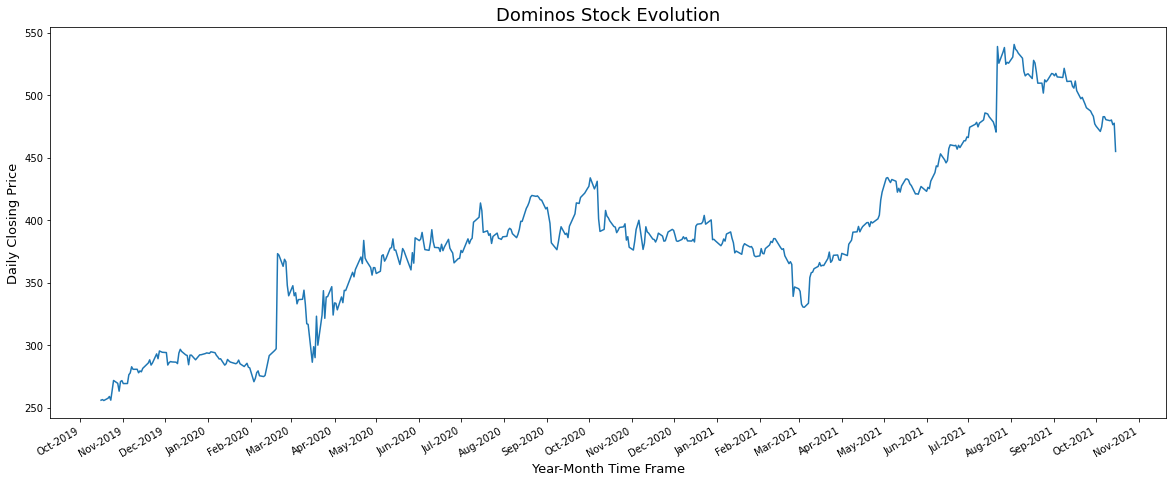

In [11]:
pizza['Date'] = pd.to_datetime(pizza['Date'])
date = pizza['Date']
value = pizza['Close']

fig, ax = plt.subplots(figsize=(20,8))

plt.title("Dominos Stock Evolution",fontsize=18)
plt.xlabel("Year-Month Time Frame",fontsize=13)
plt.ylabel("Daily Closing Price",fontsize=13)

half_year_locator = mdates.MonthLocator(interval=1)
year_month_formatter = mdates.DateFormatter("%b-%Y")
monthly_locator = mdates.MonthLocator()

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_minor_locator(monthly_locator)
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(date,value);

fig.autofmt_xdate()

# **GAUGE DIAGRAM**

### INSTALL PACKAGES & IMPORT LIBRARIES

In [12]:
!pip install pygal

In [13]:
!pip install CairoSVG

In [14]:
import pygal
import CairoSVG

ModuleNotFoundError: No module named 'CairoSVG'

### LOAD DATASET

In [132]:
netflix = pd.read_csv("C:/Users/Jordi Morente/Downloads/DataNetflixRevenue2020_V2.csv")
netflix.head()

,Area,Years,Revenue
0,United States and Canada,Q1 - 2018,1976157000
1,"Europe, Middle East and Africa",Q1 - 2018,886649000
2,Latin America,Q1 - 2018,540182000
3,Asia-Pacific,Q1 - 2018,199117000
4,United States and Canada,Q2 - 2018,2049546000


In [133]:
netflix.to_excel (r'C:/Users/Jordi Morente/Downloads/Netflix.xlsx', index = None, header=True)

### CHECK THE TYPES AND MISS VALUES

In [16]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Area     40 non-null     object
 1   Years    40 non-null     object
 2   Revenue  40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [17]:
netflix.isna().sum()

Area       0
Years      0
Revenue    0
dtype: int64

In [18]:
netflix.isnull().sum()

Area       0
Years      0
Revenue    0
dtype: int64

In [19]:
netflix = netflix.drop(columns=['Years'])
netflix.head()

,Area,Revenue
0,United States and Canada,1976157000
1,"Europe, Middle East and Africa",886649000
2,Latin America,540182000
3,Asia-Pacific,199117000
4,United States and Canada,2049546000


### SUM REVENUES BY AREA

In [20]:
netflix.groupby(['Area']).sum()

,Revenue
Area,
Asia-Pacific,3468137000
"Europe, Middle East and Africa",13122785000
Latin America,6611952000
United States and Canada,23875186000


In [21]:
netflix_Asia = netflix[netflix['Area'] == 'Asia-Pacific']
revenue_Asia = netflix_Asia['Revenue'].sum()
print('Asia Revenue:', revenue_Asia)

Asia Revenue: 3468137000


In [22]:
netflix_Europe_Africa = netflix[netflix['Area'] == 'Europe,  Middle East and Africa']
revenue_Europe_Africa = netflix_Europe_Africa['Revenue'].sum()
print('Europe, Middle East and Africa Revenue:', revenue_Europe_Africa)

Europe, Middle East and Africa Revenue: 13122785000


In [23]:
netflix_LatinAmerica = netflix[netflix['Area'] == 'Latin America']
revenue_LatinAmerica = netflix_LatinAmerica['Revenue'].sum()
print('Latin America Revenue:', revenue_LatinAmerica)

Latin America Revenue: 6611952000


In [24]:
netflix_USA_Canada = netflix[netflix['Area'] == 'United States and Canada']
revenue_USA_Canada = netflix_USA_Canada['Revenue'].sum()
print('United States and Canada Revenue:', revenue_USA_Canada)

United States and Canada Revenue: 23875186000


### VISUALIZATION

REVENUE BY AREA

In [25]:
gauge = pygal.Gauge()

OSError: no library called "cairo-2" was found
no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': error 0x7e
cannot load library 'libcairo.2.dylib': error 0x7e
cannot load library 'libcairo-2.dll': error 0x7e

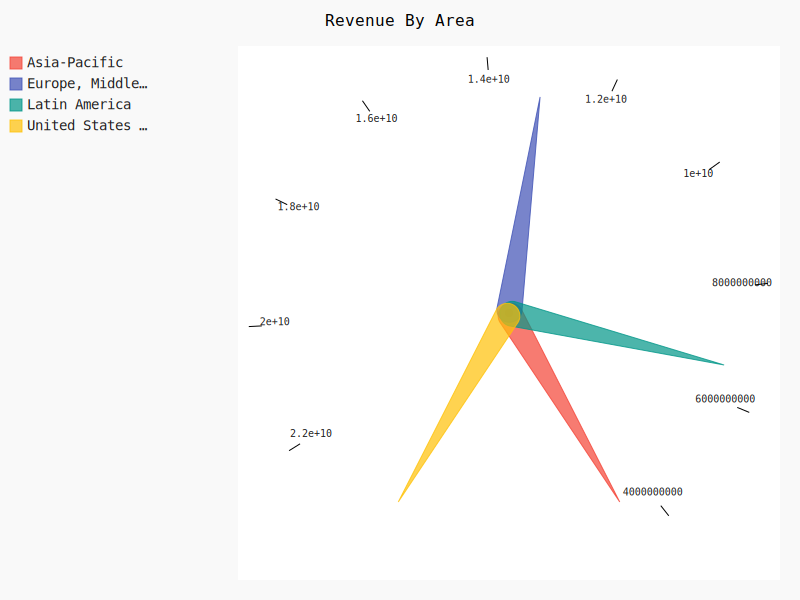

In [26]:
gauge.title = 'Revenue By Area'

gauge.add('Asia-Pacific', revenue_Asia)
gauge.add('Europe, Middle East and Africa', revenue_Europe_Africa)
gauge.add('Latin America',revenue_LatinAmerica)
gauge.add('United States and Canada', revenue_USA_Canada)

# UPSET: VISUALIZING INTERSECTING SETS 

In [119]:
dataset1 = pd.read_csv('C:/Users/Jordi Morente/Downloads/supermarket_sales.csv')
dataset1.dropna(inplace = True)

In [120]:
dataset1[:2]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [125]:
dataset1['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [117]:
dataset = pd.read_csv('C:/Users/Jordi Morente/Downloads/SampleSuperstore.csv')
dataset.dropna(inplace = True)

In [118]:
dataset[:2]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820


In [128]:
dataset = pd.read_csv('C:/Users/Jordi Morente/Downloads/imdb_top_1000.csv')
dataset.dropna(inplace = True)

In [131]:
dataset['Genre'].values

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama', 'Crime, Drama',
       'Crime, Drama', 'Action, Adventure, Drama', 'Crime, Drama',
       'Biography, Drama, History', 'Action, Adventure, Sci-Fi', 'Drama',
       'Action, Adventure, Drama', 'Drama, Romance', 'Western',
       'Action, Adventure, Drama', 'Action, Sci-Fi',
       'Biography, Crime, Drama', 'Action, Adventure, Fantasy', 'Drama',
       'Comedy, Drama, Thriller', 'Adventure, Drama, Sci-Fi',
       'Crime, Drama', 'Animation, Adventure, Family', 'Drama, War',
       'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller',
       'Action, Adventure, Fantasy', 'Action, Adventure, Drama',
       'Crime, Drama, Thriller', 'Drama, Music',
       'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
       'Crime, Drama, Thriller', 'Biography, Drama, Music',
       'Action, Adventure, Drama', 'Drama', 'Crime, Mystery, Thriller',
       'Action, Crime, Drama', 'Animation, 

In [129]:
dataset['Genre'].value_counts()

Drama                         58
Drama, Romance                26
Comedy, Drama                 24
Crime, Drama, Thriller        22
Action, Adventure, Sci-Fi     21
                              ..
Action, Adventure, Mystery     1
Comedy, Mystery, Romance       1
Action, Biography, Crime       1
Horror, Thriller               1
Comedy, Drama, Musical         1
Name: Genre, Length: 172, dtype: int64

In [108]:
dataset['Genres'] = dataset['Genre'].str.split(", ")

In [109]:
dataset[:2]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Genres
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",[Drama]
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411","[Crime, Drama]"


In [110]:
one_hot = pd.get_dummies(dataset['Genre'])
one_hot

,"Action, Adventure","Action, Adventure, Comedy","Action, Adventure, Drama","Action, Adventure, Family","Action, Adventure, Fantasy","Action, Adventure, History","Action, Adventure, Horror","Action, Adventure, Mystery","Action, Adventure, Romance","Action, Adventure, Sci-Fi",...,"Film-Noir, Mystery, Thriller",Horror,"Horror, Mystery, Sci-Fi","Horror, Mystery, Thriller","Horror, Sci-Fi","Horror, Thriller","Mystery, Romance, Thriller","Mystery, Sci-Fi, Thriller","Mystery, Thriller",Western
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
dataset = dataset.join(one_hot)
dataset.head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,...,"Film-Noir, Mystery, Thriller",Horror,"Horror, Mystery, Sci-Fi","Horror, Mystery, Thriller","Horror, Sci-Fi","Horror, Thriller","Mystery, Romance, Thriller","Mystery, Sci-Fi, Thriller","Mystery, Thriller",Western
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,...,0,0,0,0,0,0,0,0,0,0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
with open('movies.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)
    
    # write the data
    writer.writerow(data)